# house sales

---

### Intro / Введение

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

---

### Features / Признаки

**date** дата продажи

**bedrooms** кол-во спален

**bathrooms** кол-во санузлов (дробное?)

**sqft_living** жилая площадь, кв. фут

**sqft_lot** общая площадь, кв. фут

**floors** кол-во этажей

**waterfront** набережная, 0 или 1

**view** вид, оценка от 1 до 5, 0 - без вида или незаполнено

**condition** состояние, оценка от 1 до 5

**grade** класс, оценка от 1 до 13

**sqft_above** площадь над землей, кв. фут

**sqft_basement** площадь под землей, кв. фут

**yr_built** год постройки

**yr_renovated** год ремонта, 0 - без ремонта или незаполнено

**zipcode** почтовый индекс

**lat** широта

**long** долгота

**sqft_living15** жилая площадь, кв. фут

**sqft_lot15** общая площадь, кв. фут

**price (target)** цена $

---

### Task / Задача
отработать навыки работы с признаками

In [131]:
#@title ### Import / Загрузка

try:
  import pytolemaic
except ImportError:
  %pip install pytolemaic
  import pytolemaic

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression

sns.set_theme(style="whitegrid")

X, y = fetch_openml(data_id=42092, return_X_y=True, as_frame=True)
data = X
data['price'] = y

### Exploratory Data Analysis / Исследующий анализ данных

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           21613 non-null  object  
 1   bedrooms       21613 non-null  float64 
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  float64 
 4   sqft_lot       21613 non-null  float64 
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  float64 
 7   view           21613 non-null  float64 
 8   condition      21613 non-null  float64 
 9   grade          21613 non-null  float64 
 10  sqft_above     21613 non-null  float64 
 11  sqft_basement  21613 non-null  float64 
 12  yr_built       21613 non-null  float64 
 13  yr_renovated   21613 non-null  float64 
 14  zipcode        21613 non-null  category
 15  lat            21613 non-null  float64 
 16  long           21613 non-null  float64 
 17  sqft_living15  21613 non-null  

In [133]:
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,20141013T000000,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,221900.0
1,20141209T000000,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,538000.0
2,20150225T000000,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,180000.0
3,20141209T000000,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,604000.0
4,20150218T000000,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,510000.0


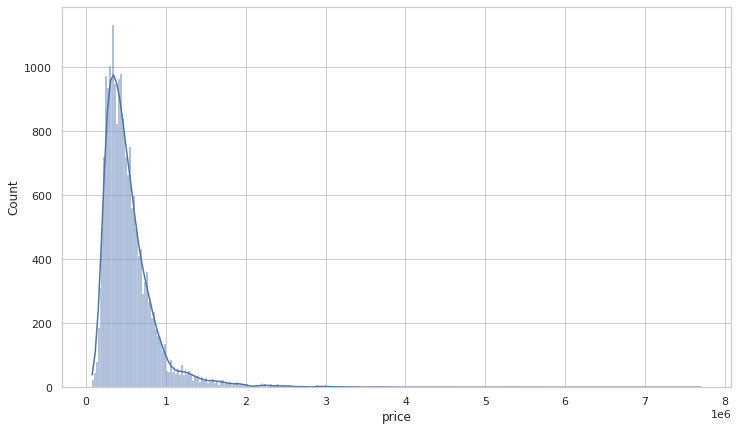

In [134]:
#@title #### Observation of target variable / Наблюдение целевого признака
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data['price'], kde=True, ax=ax);

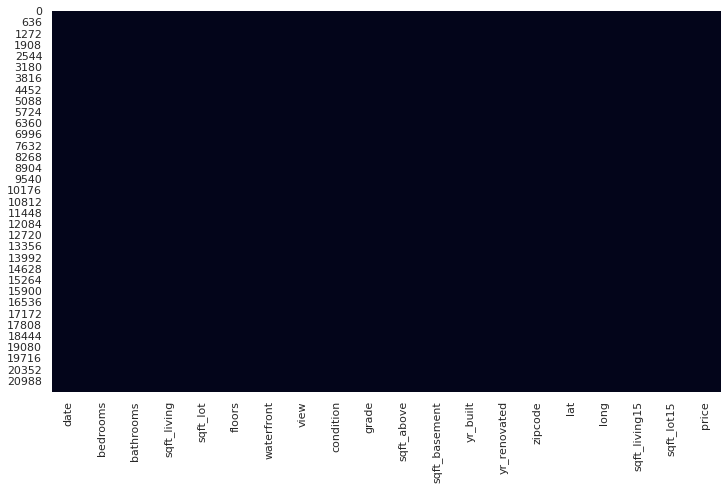

In [135]:
#@title #### Missing values / Пропущенные значения

#@markdown нет пропущенных значений

fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data.isnull(), cbar=False, ax=ax);

#### Categorical features / Категориальные признаки

In [136]:
data['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: category
Categories (70, object): ['98001', '98002', '98003', '98004', ..., '98178', '98188', '98198', '98199']

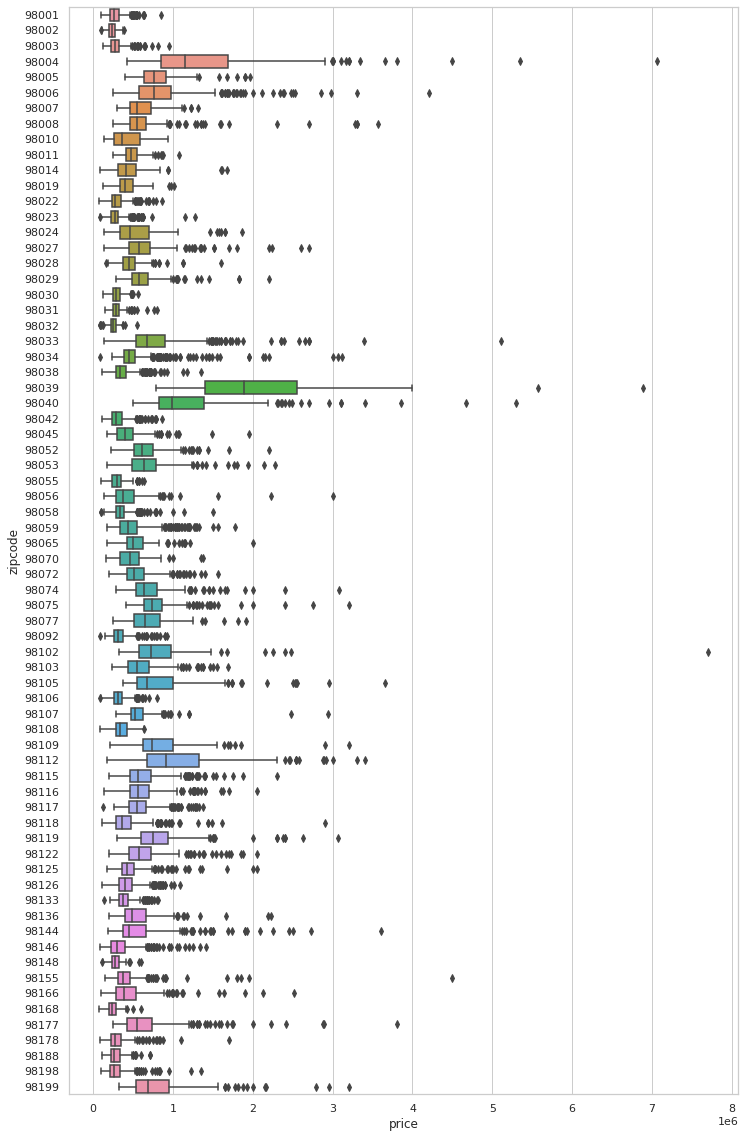

In [137]:
fig, ax = plt.subplots(figsize=(12, 20))
sns.boxplot(y='zipcode', x='price', data=data, orient='h', ax=ax);

In [138]:
#remove outliers
data[data['zipcode'] == '98102']['price'].quantile(0.98)

2388000.0000000005

In [139]:
encoder = OrdinalEncoder(dtype='int16')
data[['zipcode']] = encoder.fit_transform(data[['zipcode']])

#### Numerical features / Числовые признаки

In [140]:
data['date'] = data['date'].str[:4].astype('int16')

int_cols = ['bedrooms', 'sqft_living', 'sqft_lot',
            'waterfront', 'view', 'condition',
            'grade', 'sqft_above', 'sqft_basement',
            'yr_built', 'yr_renovated', 'sqft_living15',
            'sqft_lot15', 'price']
data[int_cols] = data[int_cols].astype('int')

In [141]:
num_cols = list(data.columns)
num_cols.remove('zipcode')
data[num_cols].head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,2014,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,2014,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,2015,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,2014,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,2015,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000


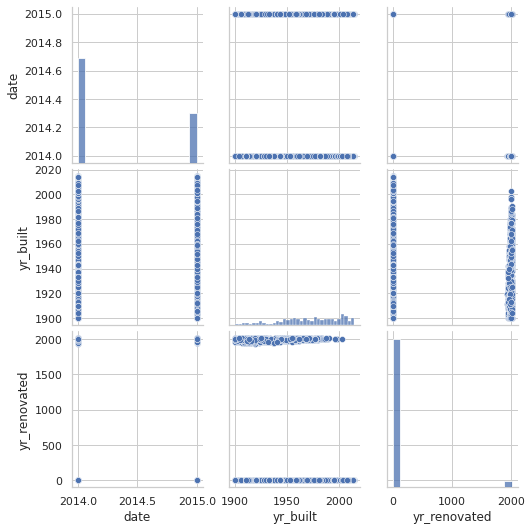

In [142]:
sns.pairplot(data[['date', 'yr_built', 'yr_renovated']]);

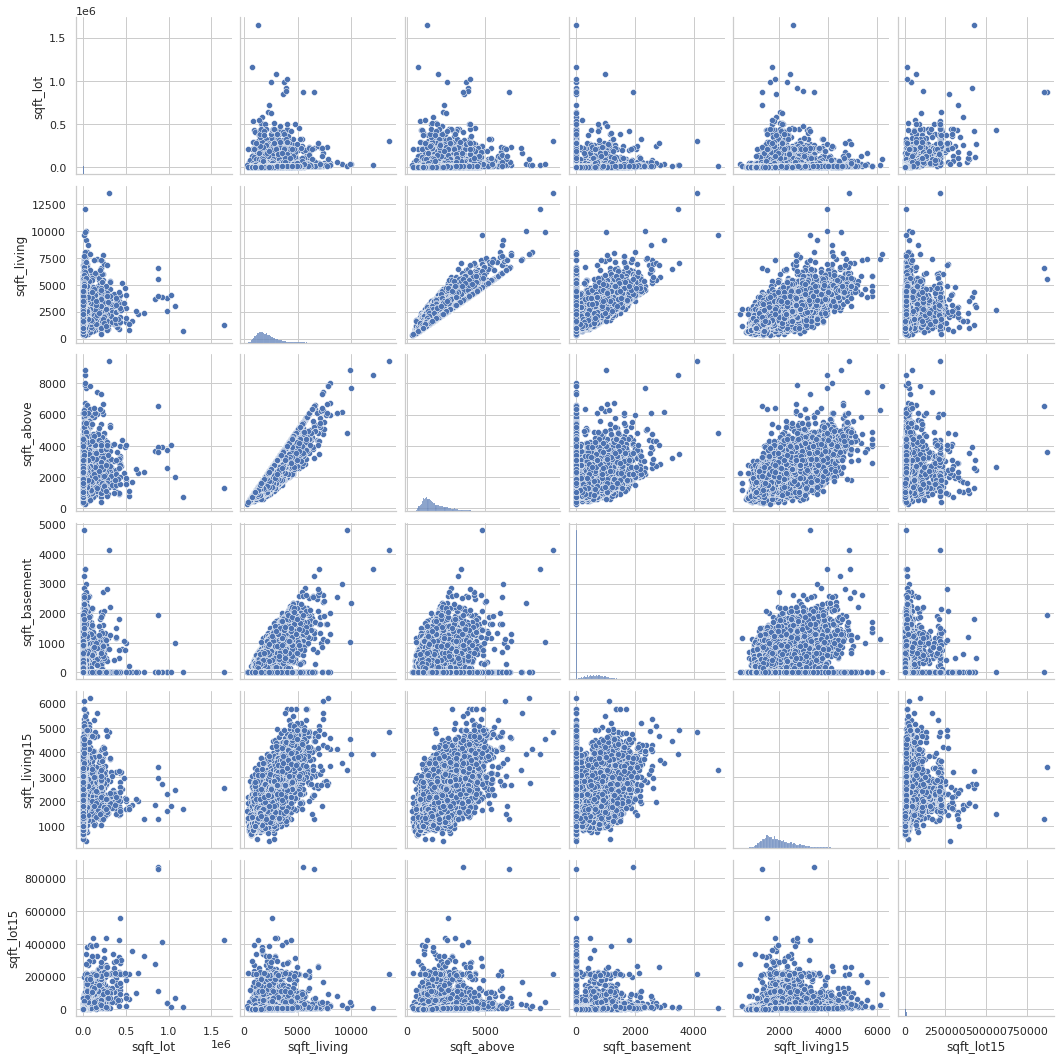

In [143]:
sns.pairplot(data[['sqft_lot', 'sqft_living', 'sqft_above',
                    'sqft_basement', 'sqft_living15', 'sqft_lot15']]);

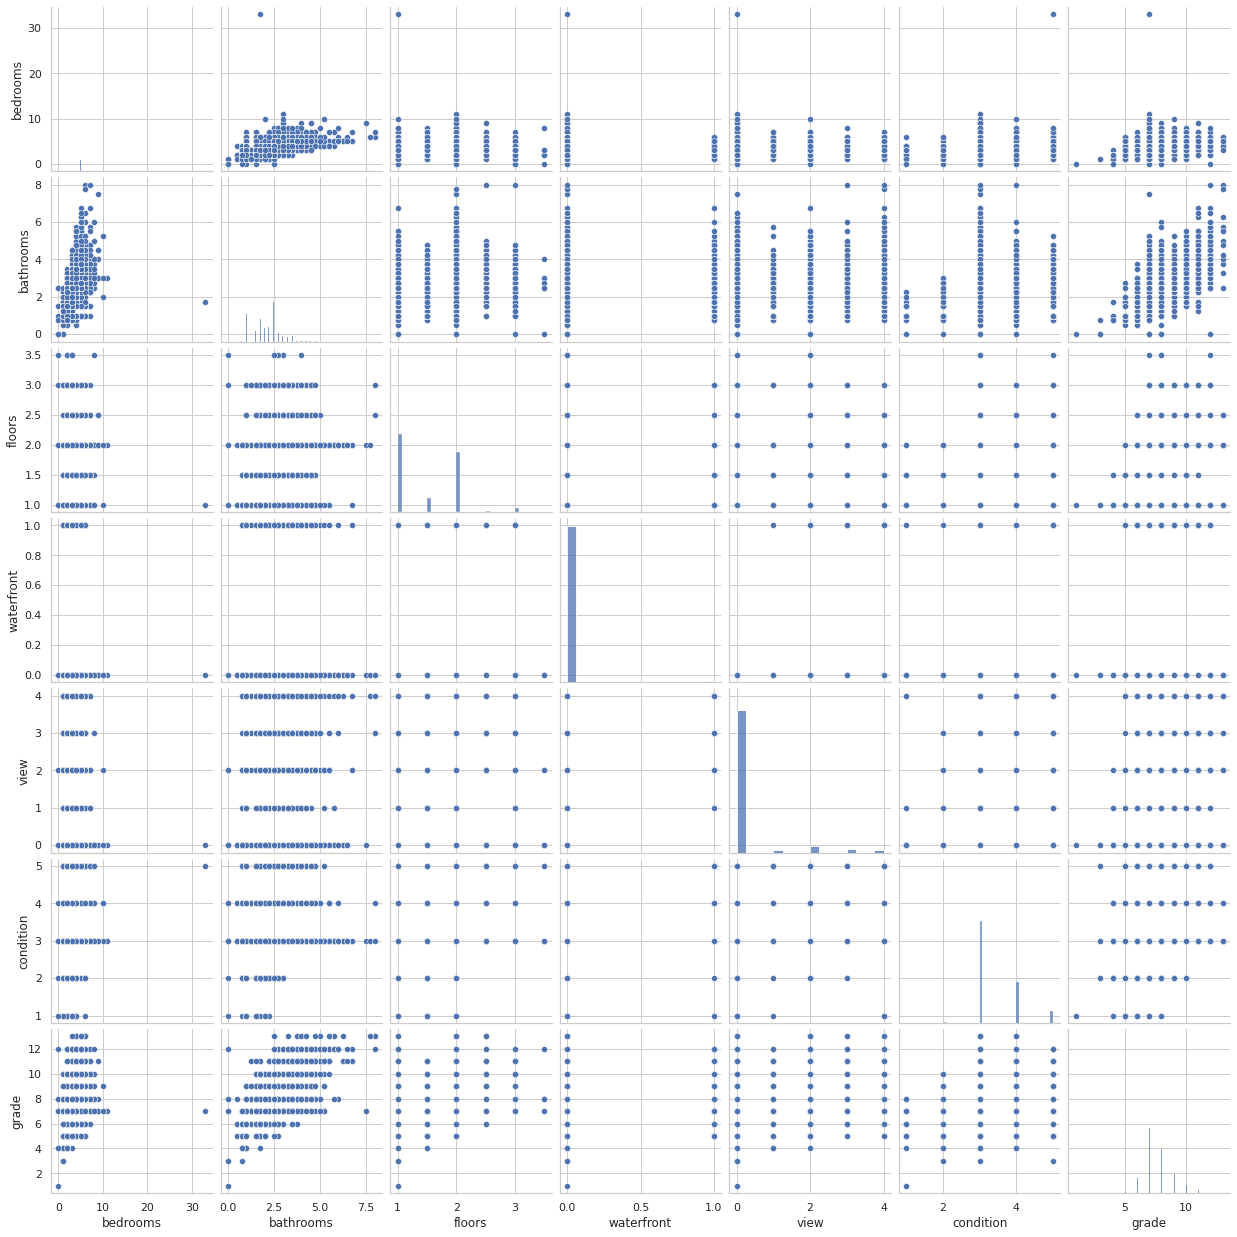

In [144]:
sns.pairplot(data[['bedrooms', 'bathrooms', 'floors', 'waterfront',
                      'view', 'condition', 'grade']]);

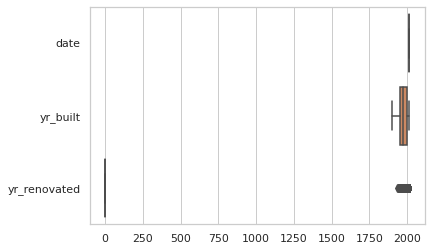

In [145]:
sns.boxplot(data=data[['date', 'yr_built', 'yr_renovated']], orient='h');

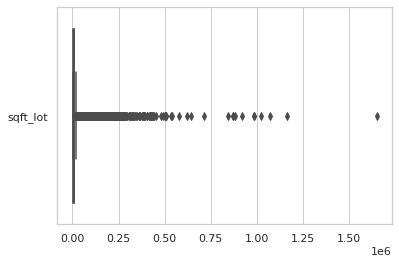

In [146]:
sns.boxplot(data=data[['sqft_lot']], orient='h');

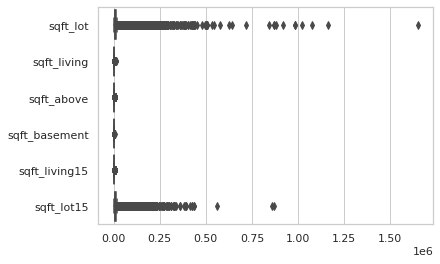

In [147]:
sns.boxplot(data=data[['sqft_lot', 'sqft_living', 'sqft_above',
                    'sqft_basement', 'sqft_living15', 'sqft_lot15']], orient='h');

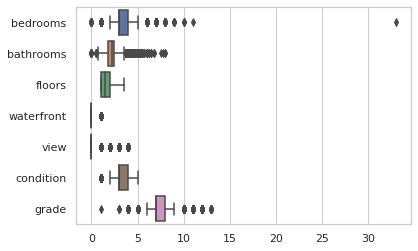

In [148]:
sns.boxplot(data=data[['bedrooms', 'bathrooms', 'floors', 'waterfront',
                      'view', 'condition', 'grade']], orient='h');

In [149]:
#remove outliers

#### Variance / Дисперсия

In [150]:
var = VarianceThreshold(threshold=0.3)
var = var.fit(X, y)
X.columns[var.get_support(indices=True)]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [151]:
# low variance: floors, waterfront, lat, long

#### Correlation to the target / Корреляция к целевому признаку

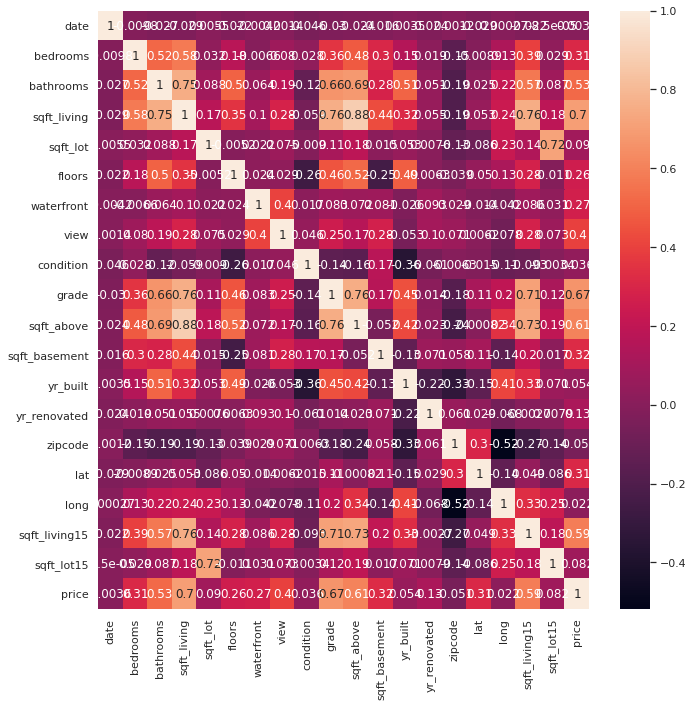

In [152]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data.corr(), annot=True, ax=ax);

In [153]:
#remove weak features

### Feature Engineering / Конструирование признаков

In [ ]:
data['with_basement'] = (data['sqft_basement'] > 0).astype('int')
data['multiple_bathrooms'] = (data['bathrooms'] >= 2).astype('int')
data['multiple_floors'] = (data['floors'] >= 2).astype('int')
data['vintage_building'] = (data['yr_built'] < 1980).astype('int')
data['age'] = np.abs(data['date'] - data['yr_built']).astype('int')

In [ ]:
for i in data.index:
    if data.loc[i, 'yr_renovated'] == 0:
        data.loc[i, 'renov_age'] = data.loc[i, 'age']
    else:
        data.loc[i, 'renov_age'] = np.abs(data.loc[i, 'date'] - data.loc[i, 'yr_renovated'])
        
data['renov_age'] = data['renov_age'].astype('int')

In [ ]:
#featuretools

### Data Wrangling and Transformation / Первичная обработка данных

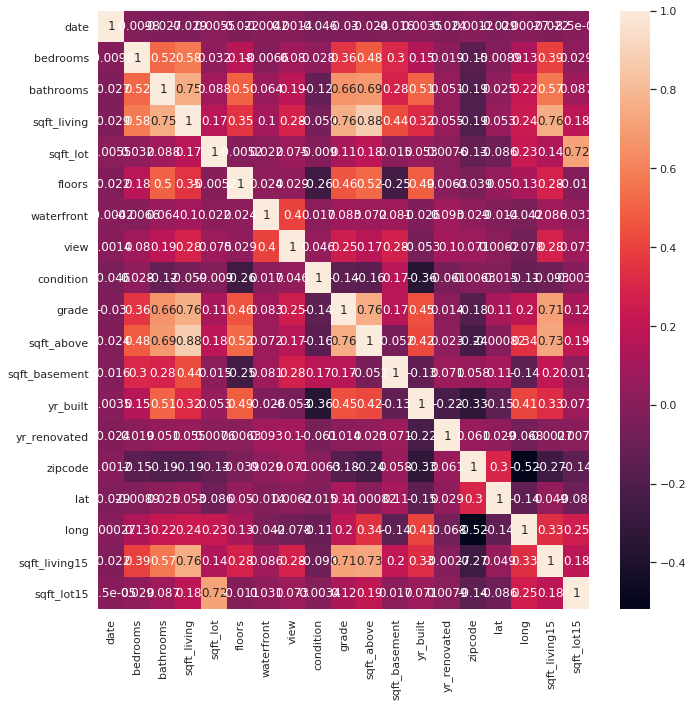

In [154]:
#@title #### Multicollinearity / Мультиколинеарность
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data.drop(columns=['price']).corr(), annot=True, ax=ax);

sqft_living15 и sqft_lot15 дублируют sqft_living и sqft_lot, а так же grade и sqft_above коррелируют с sqft_living. то есть можно отбросить первые два признака, а так же sqft_above, который можно получить как sqft_living - sqft_basement

In [155]:
data.drop(columns=['sqft_living15', 'sqft_lot15', 'sqft_above'], inplace=True)

In [156]:
y = data['price']
X = data.drop(columns=['price'])

In [157]:
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,66,47.5112,-122.257
1,2014,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,55,47.7210,-122.319
2,2015,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,16,47.7379,-122.233
3,2014,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,58,47.5208,-122.393
4,2015,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,37,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,42,47.6993,-122.346
21609,2015,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,60,47.5107,-122.362
21610,2014,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,59,47.5944,-122.299
21611,2015,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,15,47.5345,-122.069


In [158]:
#@title #### Scaling / Масштабирование
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [159]:
#@title #### Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

### Machine Learning

In [160]:
estimator = LinearRegression(n_jobs=-1).fit(X_train, y_train)
estimator.score(X_test, y_test)

0.7021327042889598

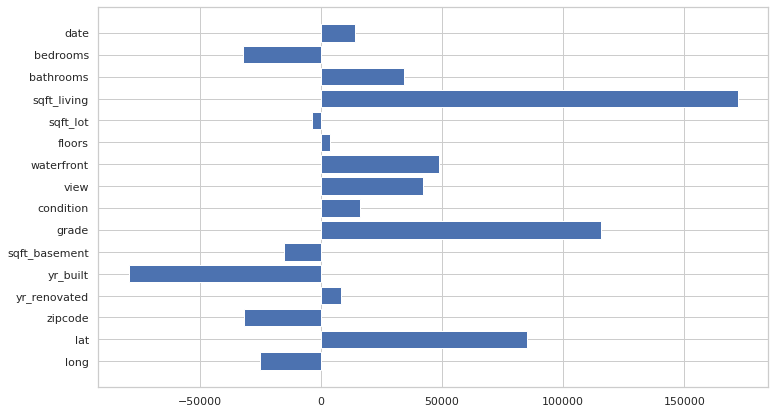

In [161]:
fig, ax = plt.subplots(figsize=(12, 7))

cols = data.drop(columns=['price']).columns
y_pos = np.arange(len(cols))

ax.barh(y_pos, estimator.coef_)
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
plt.show()

In [ ]:
"""
pytrust = PyTrust(model=estimator,
       xtrain=X_train, ytrain=y_train,
       xtest=X_test, ytest=y_test)

# dataset analysis report
dataset_analysis_report = pytrust.dataset_analysis_report

# feature sensitivity report
sensitivity_report = pytrust.sensitivity_report

# model's performance report
scoring_report = pytrust.scoring_report

# overall model's quality report
quality_report = pytrust.quality_report

for report in [dataset_analysis_report, sensitivity_report, scoring_report, quality_report]:
    report.plot() # plot graphs
    pprint(report.to_dict(printable=True)) # export report as a dictionary
    pprint(report.to_dict_meaning()) # print documentation for above dictionary

# Insights & issues discovered in your data/model
insights = pytrust.insights

# estimate uncertainty of a prediction
uncertainty_model = pytrust.create_uncertainty_model()

# explain a prediction with Lime
create_lime_explainer = pytrust.create_lime_explainer()
"""

In [163]:
#shuffle col
#df1['HS_FIRST_NAME'] = np.random.permutation(df[4].values)